In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Impor Data: Kematian Tahunan Ibu Melahirkan di RSU Wina</h3>

In [3]:
tahunan = pd.read_csv('./datasets/yearly_deaths_by_clinic.csv')
display(tahunan.head(3))

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1


,year,births,deaths,clinic,proporsi_kematian
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542


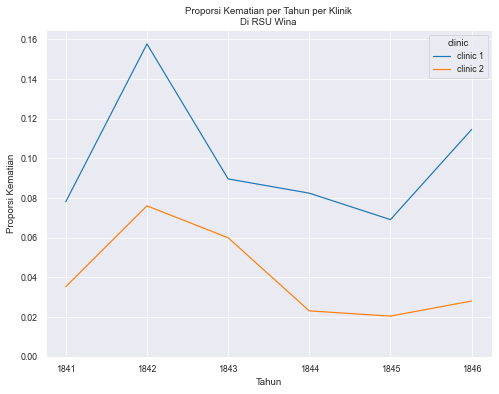

In [6]:
# buat kolom baru, proporsi kematian
tahunan['proporsi_kematian'] = tahunan['deaths']/tahunan['births']
display(tahunan.head(3))

# plot proporsi kematian per klinik di RSU Wina
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]
sns.set_context("paper")
sns.set_style("darkgrid")
g = sns.lineplot(x="year", y="proporsi_kematian", data=tahunan, hue="clinic")
g.set(xlabel="Tahun", ylabel="Proporsi Kematian")
g.set_title("Proporsi Kematian per Tahun per Klinik\nDi RSU Wina")
plt.ylim(bottom=0)
plt.savefig('./proporsi_kematian_antara_kedua_klinik.png', dpi=300)

<h3>Import Data: Kematian Ibu Melahirkan Sebelum dan Sesudah Cuci Tangan</h3>

In [11]:
klinik1 = pd.read_csv('./datasets/monthly_deaths.csv', parse_dates=['date'])

# waktu mulai cuci tangan
memulai = pd.to_datetime('1847-06-01')

# buat kolom baru: cuci_tangan dan proporsi_kematian
keterangan = [
    "Sebelum" if val<memulai
    else "Sesudah" for val in klinik1['date']
]
klinik1['cuci_tangan'] = keterangan
klinik1['proporsi_kematian'] = klinik1['deaths']/klinik1['births']
display(klinik1.head(3))

,date,births,deaths,cuci_tangan,proporsi_kematian
0,1841-01-01,254,37,Sebelum,0.145669
1,1841-02-01,239,18,Sebelum,0.075314
2,1841-03-01,277,12,Sebelum,0.043321


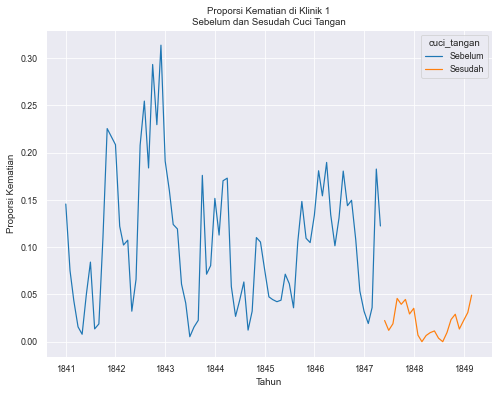

In [36]:
%matplotlib inline
sns.set_context("paper")
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [8, 6]
g = sns.lineplot(x="date", y="proporsi_kematian", data=klinik1, hue="cuci_tangan")
g.set(xlabel="Tahun", ylabel="Proporsi Kematian")
g.set_title("Proporsi Kematian di Klinik 1\nSebelum dan Sesudah Cuci Tangan")
plt.savefig('./proporsi_kematian_sebelum_dan_sesudah_cuci_tangan.png', dpi=300)

In [27]:
# pisahkan data sebelum dan sesudah mencuci tangan
sebelum = klinik1.loc[klinik1['date']<memulai, 'proporsi_kematian']
sesudah = klinik1.loc[klinik1['date']>=memulai, 'proporsi_kematian']

# cari perbedaan median
med_sm = np.median(sebelum)
med_sh = np.median(sesudah)
print("Perbedaan Median: {}%".format((med_sm-med_sh)*100))
print("Dari: {}% ke {}%".format(round(med_sm, 3)*100, round(med_sh, 3)*100))

Perbedaan Median: 8.453288185740501%
Dari: 10.5% ke 2.1%


<h3>Menghitung Penurunan Proporsi Kematian</h3>

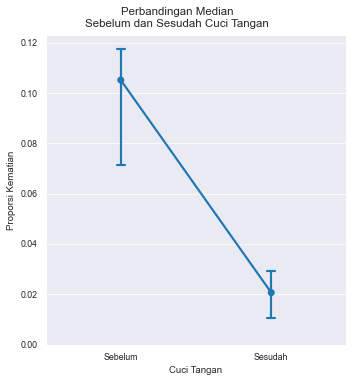

In [37]:
%matplotlib inline
sns.set_context("paper")
sns.set_style("darkgrid")
g = sns.catplot(x="cuci_tangan", y="proporsi_kematian",
                data=klinik1, kind="point", estimator=np.median,
                capsize=0.05)
g.set(xlabel='Cuci Tangan', ylabel='Proporsi Kematian')
g.fig.suptitle('Perbandingan Median\nSebelum dan Sesudah Cuci Tangan', y=1.05)
plt.ylim(bottom=0)
g.savefig('./perbedaan_median.png', dpi=300)

<h3>Analisis Bootstrap Untuk Mencari Interval Kepercayaan</h3>

In [30]:
# bootstrap analysis
med_diff = []
for idx in range(3000):
    sebelum_sam = sebelum.sample(frac=1, replace=True)
    sesudah_sam = sesudah.sample(frac=1, replace=True)
    diff = np.median(sebelum_sam) - np.median(sesudah_sam)
    med_diff.append(diff)

# mencari interval kepercayaan 95%
series_diff = pd.Series(med_diff)
interval = series_diff.quantile([0.025, 0.975])
print(interval)

0.025    0.048529
0.975    0.099900
dtype: float64


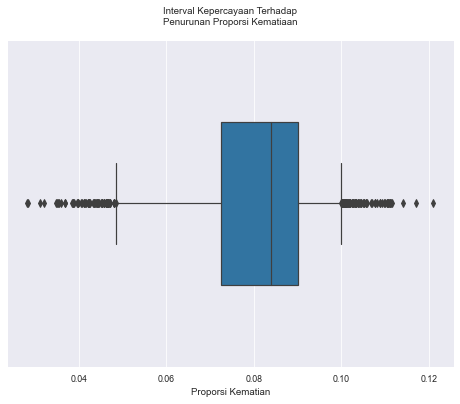

In [38]:
%matplotlib inline
sns.set_context("paper")
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [8, 6]
g = sns.boxplot(x=med_diff, whis=[2.5, 97.5], width=0.5)
g.set(xlabel="Proporsi Kematian")
g.set_title('Interval Kepercayaan Terhadap\nPenurunan Proporsi Kematiaan', y=1.03)
plt.savefig('./analisis_bootstrap_untuk_interval_kepercayan.png', dpi=300)